# Image Filtering - Edge Detection

### Basic edge filtering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data, filters, io, color, feature
import numpy as np

In [2]:
#Set colormap to grayscale and turning off pixel interpolation
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

For images, edges are basically boundaries between light and dark values. The detection of edges can be useful on its own, or it can be used as preliminary step in other algorithms (which we'll see later).

#### A 1D difference filter

Let's first consider a 1D edge, which is just the boundary in a step function:

In [3]:
step = np.zeros(40)
step[20:] = 1

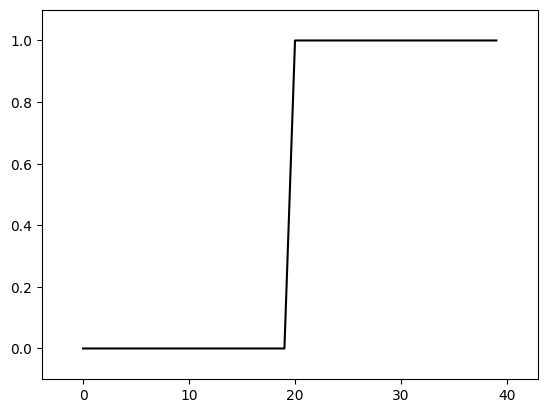

In [4]:
plt.plot(step, 'k')
plt.margins(0.1) 

To "detect" the edge, we can just take a difference of neighboring values. Here, we'll use convolution or cross-correlation to do just that:

In [5]:
edge = np.convolve(=, np.array([1, -1]), mode='valid')

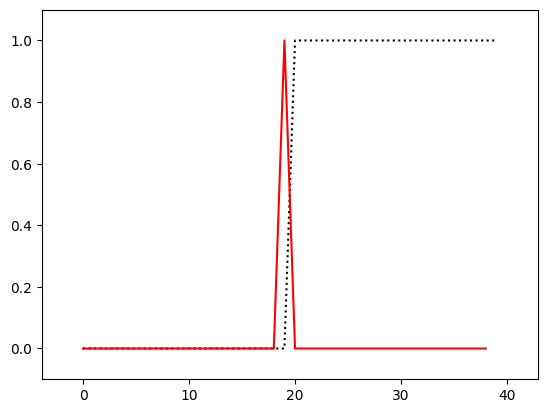

In [6]:
plt.plot(step, 'k:', edge, 'r')
plt.margins(0.1)

### Edge filters - Sobel, Canny

The Sobel filter, the most commonly used edge filter follows the same principles. The standard Sobel filter gives the gradient magnitude. This is similar to what we saw above, except that horizontal and vertical components are combined such that the direction of the gradient is ignored. Take a look at the vertical and horizontal components of the Sobel kernel:

* http://scikit-image.org/docs/dev/api/skimage.filter.html#vsobel
* http://scikit-image.org/docs/dev/api/skimage.filter.html#hsobel

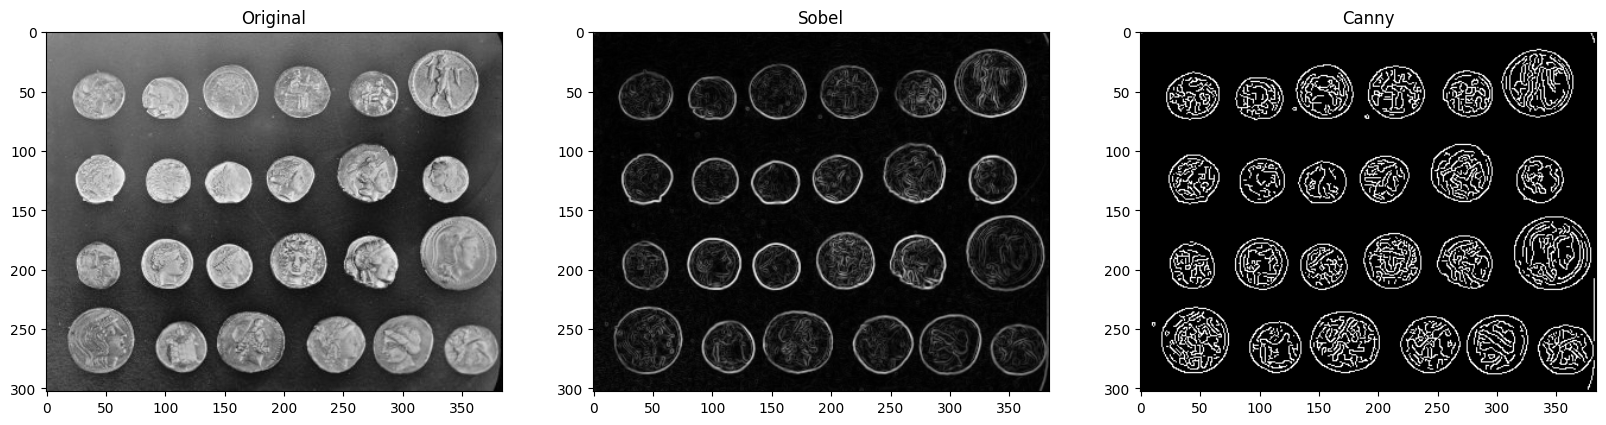

In [ ]:
image = data.coins()

#Plot images
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

#Original
ax1.imshow(image, interpolation='bilinear')
ax1.set_title('Original')

#Sobel Edge Detection
ax2.imshow(filters.sobel(image), interpolation='bilinear')
ax2.set_title('Sobel')

#Canny Edge Detection
ax3.imshow(feature.canny(image), interpolation='bilinear')
ax3.set_title('Canny')

plt.show()

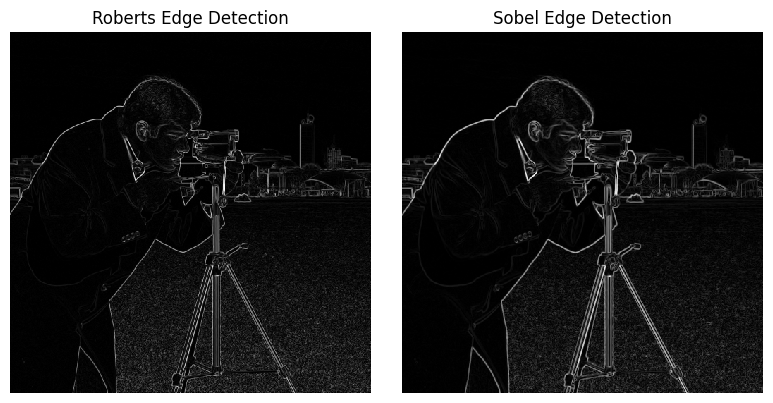

In [8]:
from skimage import filters

image = data.camera()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

### Excercise

Download any color image. Convert to grayscale and apply Sobel edge detection. 